<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-MEANS
Metodo de agrupamiento que duvude un conjubnto de datos en Kgrupos o clusteres a partir de centorids

## practica
analizar el archio analisis .csv en donde se evalua a las luz del ocean:the five aspectos de la presoalidad de diferente figuras publicas en X
*usuario:el nombre de la figura publica en X
*op:openness to experience
*"ex": extraversion
*"ag": agreblenss
*"ne": neurotiscm
*wordcount:cantidad de palabras usadas en lso twets
*categoria:actividad laborla de usaurio

### categorias
1. actors/actriz
2. cantante
3.modelor
4.tv,series
5.radio
6. tecnologia
7. deportes
8.politica
9.escritores

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#plt.rcParams["figures.figsize"]=(16,9)
plt.style.use("ggplot")

In [4]:
dataframe=pd.read_csv('analisis.csv')
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [5]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [6]:
dataframe.groupby("categoria").size()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


#visaulizacion de datos

<function matplotlib.pyplot.show(close=None, block=None)>

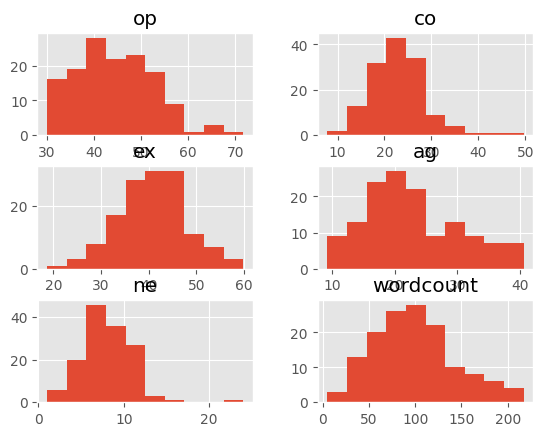

In [7]:
dataframe.drop(columns=["categoria"]).hist()
plt.show

se selecionara como dimensiones op,  ex y ag se cruzara añguna psita de agrupacion y relacion entre categoria

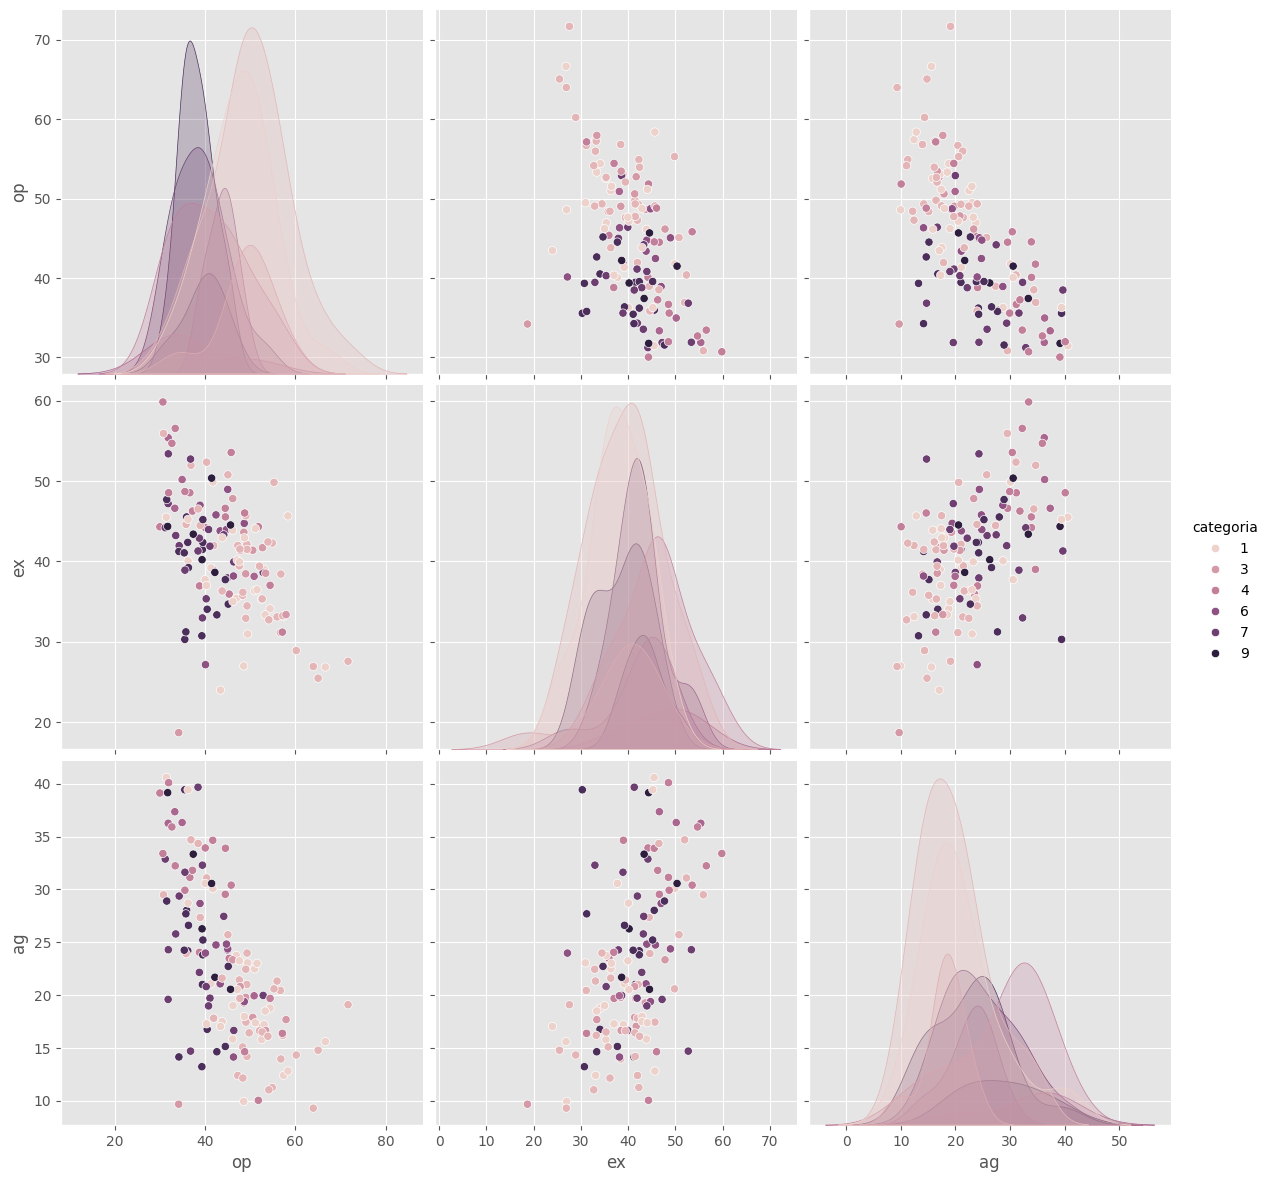

In [8]:
from numpy._core.fromnumeric import var
sns.pairplot(dataframe, hue="categoria", height=4, vars=["op","ex","ag"], kind="scatter")
plt.show()

revisando la grafica no se observa ongun ti´p de agrupacion o correlacionentre los usuarios y sus catagorias

##Definicion de entrada
se concreta la estrucutra de datos que se emplara para alimenta el algortimo

In [9]:
X=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe["categoria"])
X.shape

(140, 3)

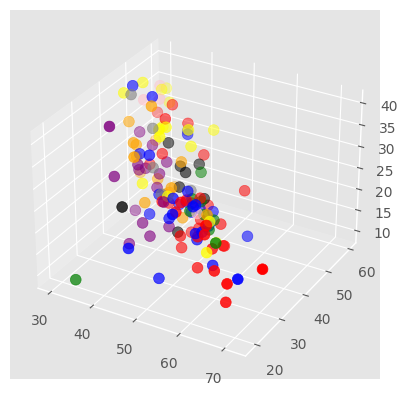

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colores=["blue","red","green","yellow","pink","black","orange","purple","grey","brown"]
asignar=[]
for row in y:
  asignar.append(colores[row-1])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

## obtener la cantidad de centroides-obtener el valor de K
se empleara la metodologia del "punto de codo" para hallar la cantidad de centoides

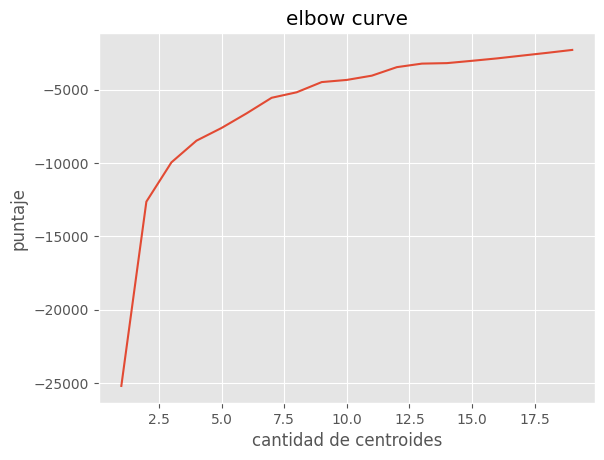

In [11]:
Nc=range(1,20)
Kmeans=[KMeans(n_clusters=i) for i in Nc]
Kmeans
score=[Kmeans[i].fit(X).score(X) for i in range(len(Kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("cantidad de centroides")
plt.ylabel("puntaje")
plt.title("elbow curve")
plt.show()

debido

##2. Ejecucaion de K-MEAN
obtener la ubicacion de los 5 centroides

In [12]:
Kmeans=KMeans(n_clusters=5).fit(X)
centroids=Kmeans.cluster_centers_
print(centroids)

[[39.52831892 42.88068556 24.35877208]
 [49.99285115 40.87133549 17.47411785]
 [35.86526147 48.13229467 34.1429713 ]
 [59.25320707 31.29770653 15.9896352 ]
 [43.3644665  31.89755772 19.50586767]]


insetar llos puntos en grafica 3D

/tmp/ipython-input-958125387.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

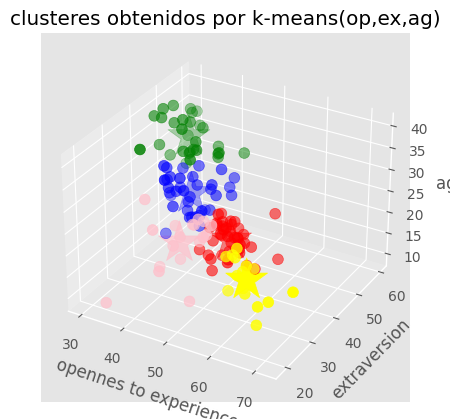

In [13]:
#PREDICIENDOLOS CLUSTERS
labels=Kmeans.predict(X)
#colocando los puntos junto con los clusters
c=Kmeans.cluster_centers_
colores=["blue","red","green","yellow","pink"]
asignar=[]
for row in labels:
  asignar.append(colores[row])
  fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(c[:,0],c[:,1],c[:,2],marker="*",color=colores,s=1000)
ax.set_xlabel("opennes to experience")
ax.set_ylabel("extraversion")
ax.set_zlabel("ag")
ax.set_title("clusteres obtenidos por k-means(op,ex,ag)")
plt.show()


se puede observar como Means ha agrupado 150 usuarios de x en 5 clusters de acuerdo a la personalidad de openness, extraversion y agreaabless

Text(0.5, 1.0, 'opennes to experience vs extraversion')

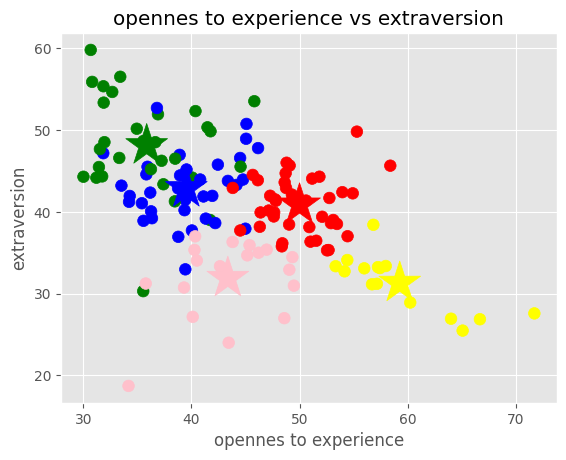

In [14]:
#graficando op vs ex
f1=dataframe["op"].values
f2=dataframe["ex"].values
plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(centroids[:,0],centroids[:,1],marker="*",c=colores,s=1000)
plt.xlabel("opennes to experience")
plt.ylabel("extraversion")
plt.title("opennes to experience vs extraversion")

In [15]:
copy=pd.DataFrame()
copy["usuario"]=dataframe["usuario"].values
copy["categoria"]=dataframe["categoria"].values
copy["label"]=labels;
candtidadGrupo=pd.DataFrame()
candtidadGrupo["color"]=colores
candtidadGrupo["cantidad"]=copy.groupby("label").size()
candtidadGrupo

,color,cantidad
0,blue,36
1,red,41
2,green,30
3,yellow,15
4,pink,18


para finalizar, se debe categorizar cada grupo respecto a sus profesiones. para este ejemplo se va identificar cuantas de esasa porfesione pertenece a cluster rojo(0)

In [16]:
group_referrer_index=copy["label"]==0
group_referrals = copy[group_referrer_index]
diversidadGrupo=pd.DataFrame()
diversidadGrupo["categoria"]=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo["cantidad"]=group_referrals.groupby("categoria").size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,5.0
7,7,11.0
8,8,8.0
9,9,2.0


In [17]:
#para ver el representate de ada cluster(el as cercano)
closest,_=pairwise_distances_argmin_min(Kmeans.cluster_centers_,X)
closest

array([ 64,  21, 121,  82, 123])

In [18]:
user=dataframe['usuario'].values
for row in closest:
  print(user[row])

ierrejon
carmenelectra
SerranoIsmael
JudgeJudy
SJP


In [19]:
X_new=np.array([[45.93,57.74,15.66]])
new_labels=Kmeans.predict(X_new)
print(new_labels)


[1]


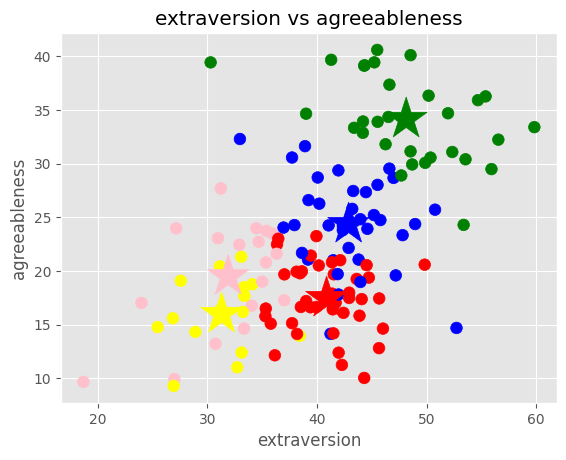

In [20]:
f1 = dataframe["ex"].values
f2 = dataframe["ag"].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:,1], centroids[:,2], marker="*", c=colores, s=1000)

plt.xlabel("extraversion")
plt.ylabel("agreeableness")
plt.title("extraversion vs agreeableness")
plt.show()

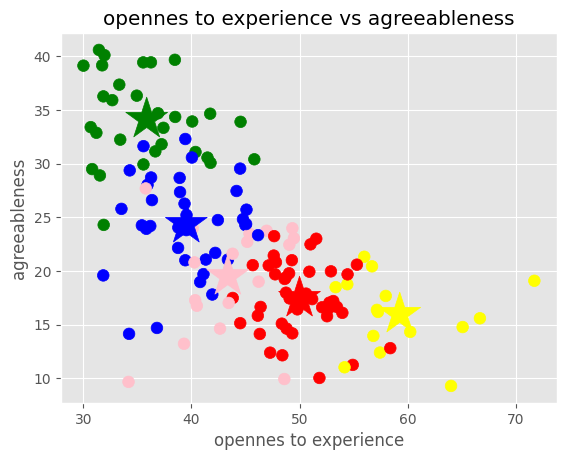

In [21]:
f1 = dataframe["op"].values
f2 = dataframe["ag"].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:,0], centroids[:,2], marker="*", c=colores, s=1000)

plt.xlabel("opennes to experience")
plt.ylabel("agreeableness")
plt.title("opennes to experience vs agreeableness")
plt.show()

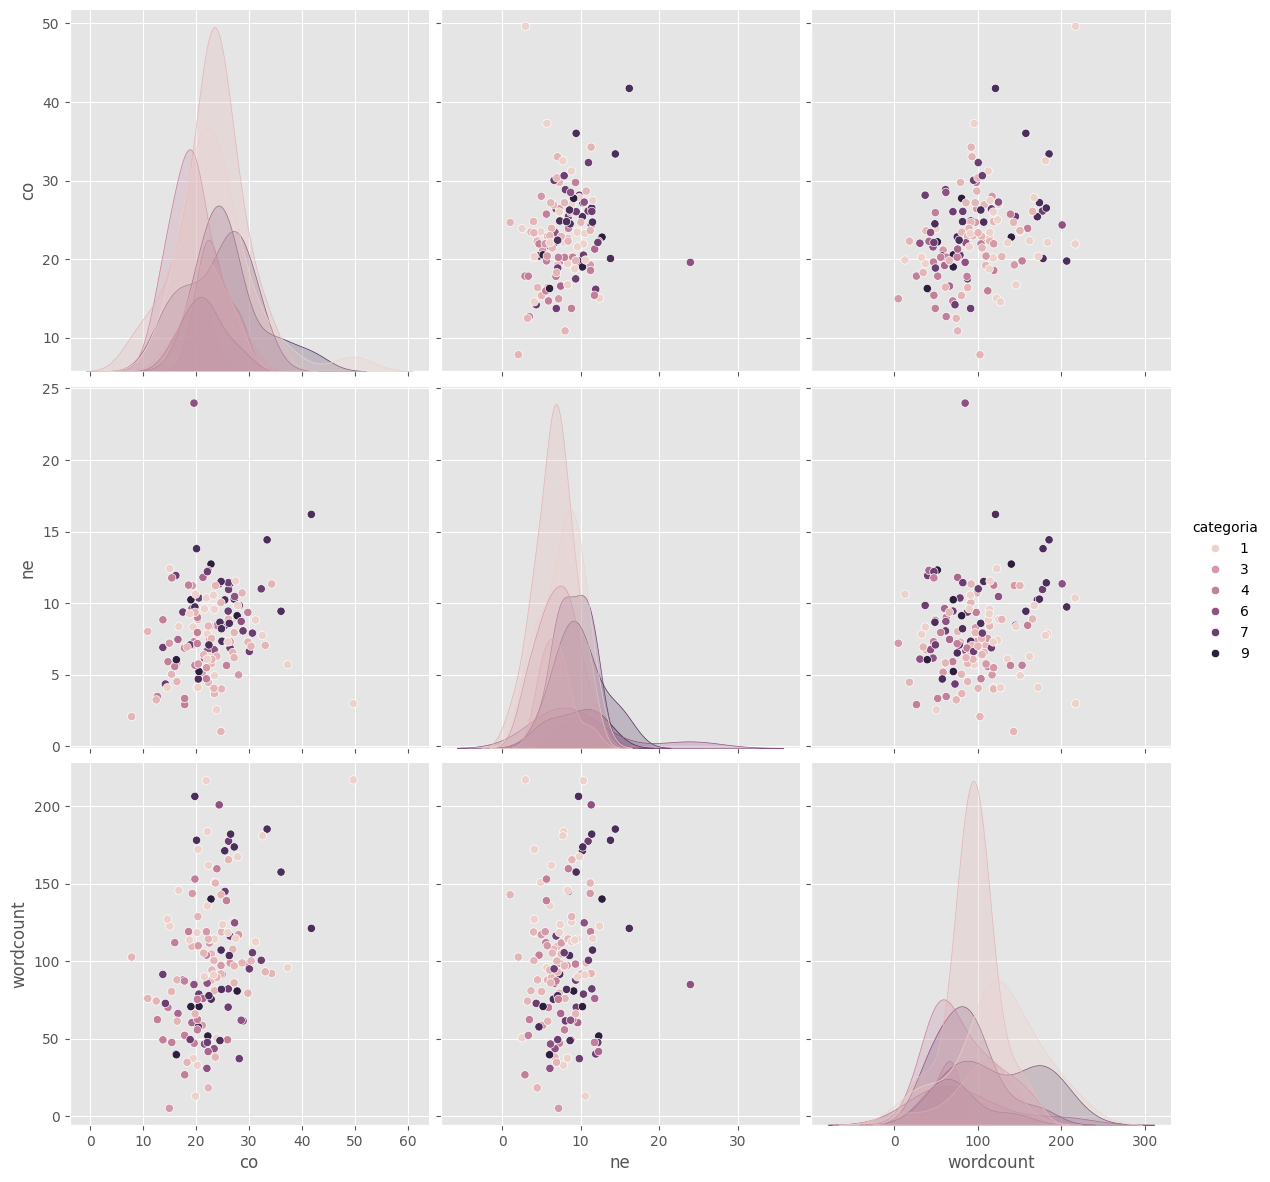

In [22]:
from numpy._core.fromnumeric import var
sns.pairplot(dataframe, hue="categoria", height=4, vars=["co","ne","wordcount"], kind="scatter")
plt.show()


In [23]:
X2 = np.array(dataframe[["co","ne","wordcount"]])
y2 = np.array(dataframe["categoria"])
X2.shape

(140, 3)

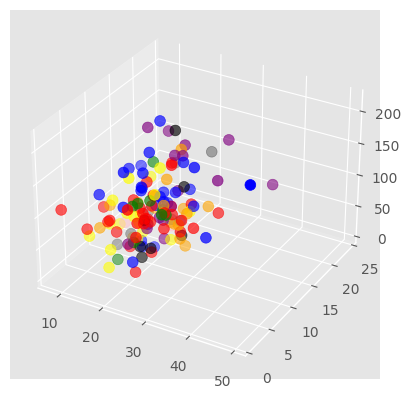

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colores = ["blue","red","green","yellow","pink","black","orange","purple","grey","brown"]
asignar2 = []

for row in y2:
    asignar2.append(colores[row-1])

ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=asignar2, s=60)

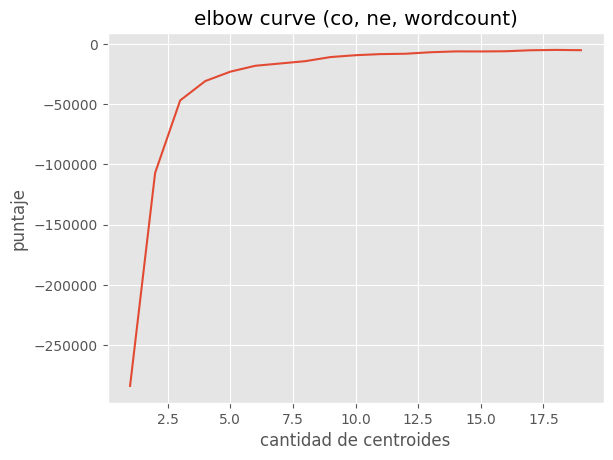

In [25]:
Nc = range(1,20)
Kmeans2 = [KMeans(n_clusters=i) for i in Nc]

score2 = [Kmeans2[i].fit(X2).score(X2) for i in range(len(Kmeans2))]

plt.plot(Nc, score2)
plt.xlabel("cantidad de centroides")
plt.ylabel("puntaje")
plt.title("elbow curve (co, ne, wordcount)")
plt.show()


In [26]:
Kmeans2 = KMeans(n_clusters=5).fit(X2)
centroids2 = Kmeans2.cluster_centers_
print(centroids2)

[[ 21.44861321   7.95833386  78.79719524]
 [ 23.872576     7.79900329 153.15919412]
 [ 24.61350683   7.79664193 110.78399762]
 [ 20.45111736   7.67170668  41.09349643]
 [ 27.61134773  10.08307827 191.22121818]]


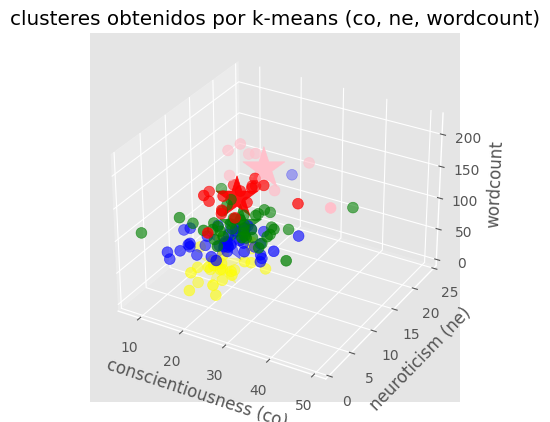

In [27]:
labels2 = Kmeans2.predict(X2)
c2 = Kmeans2.cluster_centers_

colores = ["blue","red","green","yellow","pink"]

asignar2 = []
for row in labels2:
    asignar2.append(colores[row])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=asignar2, s=60)
ax.scatter(c2[:,0], c2[:,1], c2[:,2], marker="*", color=colores, s=1000)

ax.set_xlabel("conscientiousness (co)")
ax.set_ylabel("neuroticism (ne)")
ax.set_zlabel("wordcount")
ax.set_title("clusteres obtenidos por k-means (co, ne, wordcount)")

plt.show()


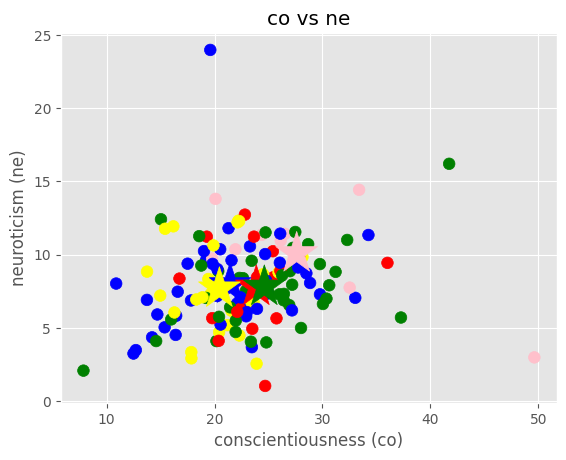

In [28]:
f1 = dataframe["co"].values
f2 = dataframe["ne"].values

plt.scatter(f1, f2, c=asignar2, s=70)
plt.scatter(centroids2[:,0], centroids2[:,1], marker="*", c=colores, s=1000)

plt.xlabel("conscientiousness (co)")
plt.ylabel("neuroticism (ne)")
plt.title("co vs ne")
plt.show()


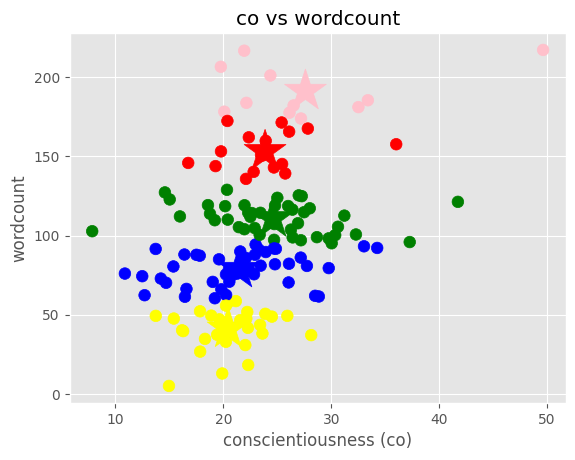

In [29]:
f1 = dataframe["co"].values
f2 = dataframe["wordcount"].values

plt.scatter(f1, f2, c=asignar2, s=70)
plt.scatter(centroids2[:,0], centroids2[:,2], marker="*", c=colores, s=1000)

plt.xlabel("conscientiousness (co)")
plt.ylabel("wordcount")
plt.title("co vs wordcount")
plt.show()


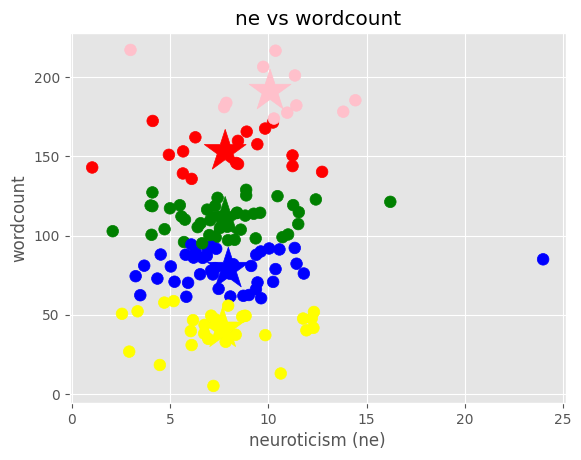

In [30]:
f1 = dataframe["ne"].values
f2 = dataframe["wordcount"].values

plt.scatter(f1, f2, c=asignar2, s=70)
plt.scatter(centroids2[:,1], centroids2[:,2], marker="*", c=colores, s=1000)

plt.xlabel("neuroticism (ne)")
plt.ylabel("wordcount")
plt.title("ne vs wordcount")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [32]:
X = np.array(dataframe[["op", "ex", "ag"]])
y = np.array(dataframe["categoria"])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.2857142857142857

Reporte de clasificación:

              precision    recall  f1-score   support

           1       0.40      0.18      0.25        11
           2       0.09      0.33      0.14         3
           3       0.00      0.00      0.00         0
           4       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.50      0.50      0.50         2
           8       0.67      0.67      0.67         3
           9       0.00      0.00      0.00         2

    accuracy                           0.29        28
   macro avg       0.33      0.32      0.31        28
weighted avg       0.37      0.29      0.30        28



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [38]:
nuevo = np.array([[50, 40, 55]])
prediccion = knn.predict(nuevo)
print("La categoría predicha es:", prediccion[0])

La categoría predicha es: 1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [40]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe["categoria"])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
proba = knn.predict_proba(X_test)
print("\nProbabilidad de clases para el primer elemento:")
print(proba[0])


Probabilidad de clases para el primer elemento:
[0.2 0.  0.  0.  0.  0.2 0.4 0.2 0. ]


In [45]:
distancias, indices = knn.kneighbors(X_test[:1])
print("\nVecinos más cercanos del primer elemento:")
print("Distancias:", distancias)
print("Índices:", indices)


Vecinos más cercanos del primer elemento:
Distancias: [[2.15620393 2.22268547 3.25206695 3.52969469 3.65119565]]
Índices: [[109  56  58  63  74]]


In [46]:
accuracy = knn.score(X_test, y_test)
print("\nAccuracy del modelo:", accuracy)


Accuracy del modelo: 0.2857142857142857


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np


In [48]:
X = np.array(dataframe[["op", "ex", "ag"]])
y = np.array(dataframe["categoria"])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
knn_manhattan = KNeighborsClassifier(
    n_neighbors=5,
    metric="manhattan"
)

In [51]:
knn_manhattan.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [52]:
pred = knn_manhattan.predict(X_test)

In [53]:
accuracy = knn_manhattan.score(X_test, y_test)

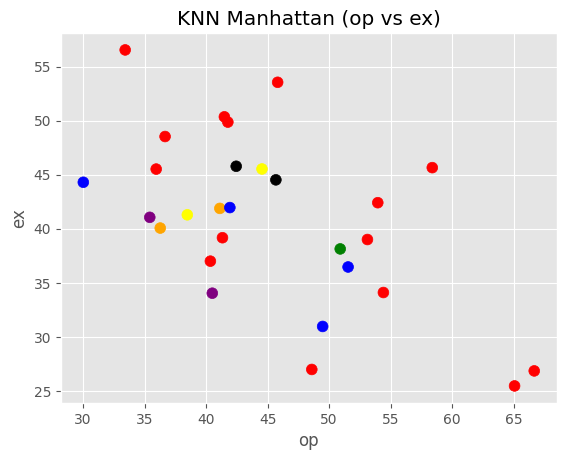

In [56]:
import matplotlib.pyplot as plt

colores = ["blue","red","green","yellow","pink","black","orange","purple","grey","brown"]

plt.scatter(X_test[:,0], X_test[:,1],
            c=[colores[i-1] for i in pred], s=60)

plt.xlabel("op")
plt.ylabel("ex")
plt.title("KNN Manhattan (op vs ex)")

plt.show()

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [58]:
X = np.array(dataframe[["op", "ex", "ag"]])
y = np.array(dataframe["categoria"])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
knn_euclid = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
)

In [61]:
knn_euclid.fit(X_train, y_train)
acc_euclid = knn_euclid.score(X_test, y_test)

In [62]:
knn_manhattan = KNeighborsClassifier(
    n_neighbors=5,
    metric="manhattan"
)

In [72]:
knn_manhattan.fit(X_train, y_train)
acc_manhattan = knn_manhattan.score(X_test, y_test)
pred_manhattan = knn_manhattan.predict(X_test)

In [73]:
pred_euclid = knn_euclid.predict(X_test)

print("Accuracy Euclidiana:", acc_euclid)
print("Accuracy Manhattan:", acc_manhattan)

Accuracy Euclidiana: 0.2857142857142857
Accuracy Manhattan: 0.32142857142857145


In [74]:
iguales = sum(pred_euclid == pred_manhattan)
diferentes = len(pred_euclid) - iguales

print("\nPredicciones iguales:", iguales)
print("Predicciones diferentes:", diferentes)


Predicciones iguales: 20
Predicciones diferentes: 8


In [54]:
print("Predicciones Manhattan:", pred[:10])
print("Accuracy Manhattan:", accuracy)

Predicciones Manhattan: [7 2 2 8 6 2 1 2 2 3]
Accuracy Manhattan: 0.32142857142857145


In [69]:
pred = knn.predict(X_test)
print("\npredicion del modelo:", pred[:10])


predicion del modelo: [7 2 3 8 6 1 1 2 2 1]


In [43]:
predicciones = knn.predict(X_test)
print("Predicciones:", predicciones[:10])

Predicciones: [7 2 3 8 6 1 1 2 2 1]


In [75]:
real = y_test

aciertos_euclid = sum(pred_euclid == real)
aciertos_manhattan = sum(pred_manhattan == real)

print("\nAciertos Euclidiana:", aciertos_euclid)
print("Aciertos Manhattan:", aciertos_manhattan)

if aciertos_euclid > aciertos_manhattan:
    print("\n→ La distancia EUCLIDIANA predice mejor.")
elif aciertos_manhattan > aciertos_euclid:
    print("\n→ La distancia MANHATTAN predice mejor.")
else:
    print("\n→ Ambas distancias predicen igual de bien.")


Aciertos Euclidiana: 8
Aciertos Manhattan: 9

→ La distancia MANHATTAN predice mejor.


In [76]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


real = y_test


clases = np.unique(y)
real_bin = label_binarize(real, classes=clases)


prob_euclid = knn_euclid.predict_proba(X_test)
prob_manhattan = knn_manhattan.predict_proba(X_test)


fpr_euclid = {}
tpr_euclid = {}
auc_euclid = {}


fpr_manhattan = {}
tpr_manhattan = {}
auc_manhattan = {}

for i in range(len(clases)):
    fpr_euclid[i], tpr_euclid[i], _ = roc_curve(real_bin[:, i], prob_euclid[:, i])
    auc_euclid[i] = auc(fpr_euclid[i], tpr_euclid[i])

    fpr_manhattan[i], tpr_manhattan[i], _ = roc_curve(real_bin[:, i], prob_manhattan[:, i])
    auc_manhattan[i] = auc(fpr_manhattan[i], tpr_manhattan[i])


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


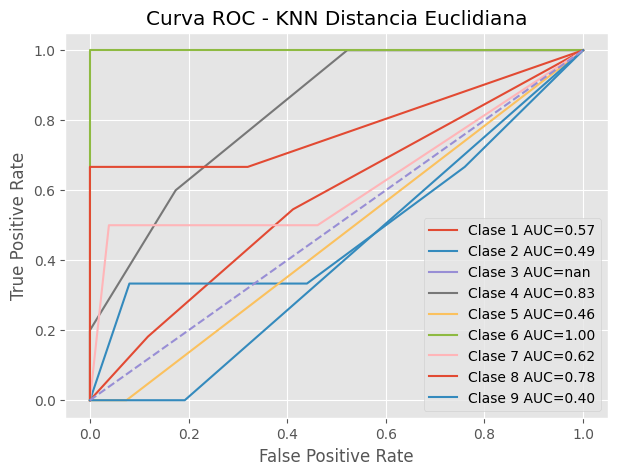

In [77]:
plt.figure(figsize=(7,5))
for i in range(len(clases)):
    plt.plot(fpr_euclid[i], tpr_euclid[i], label=f"Clase {clases[i]} AUC={auc_euclid[i]:.2f}")

plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - KNN Distancia Euclidiana")
plt.legend()
plt.show()


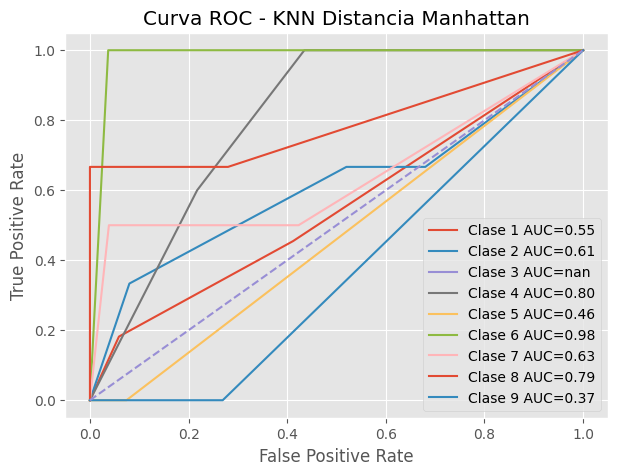

In [78]:
plt.figure(figsize=(7,5))
for i in range(len(clases)):
    plt.plot(fpr_manhattan[i], tpr_manhattan[i], label=f"Clase {clases[i]} AUC={auc_manhattan[i]:.2f}")

plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - KNN Distancia Manhattan")
plt.legend()
plt.show()


In [79]:
print("AUC Euclidiana por clase:", auc_euclid)
print("AUC Manhattan por clase:", auc_manhattan)

AUC Euclidiana por clase: {0: np.float64(0.5721925133689839), 1: np.float64(0.4933333333333333), 2: np.float64(nan), 3: np.float64(0.8260869565217391), 4: np.float64(0.46296296296296297), 5: np.float64(1.0), 6: np.float64(0.625), 7: np.float64(0.7799999999999999), 8: np.float64(0.40384615384615385)}
AUC Manhattan por clase: {0: np.float64(0.5454545454545455), 1: np.float64(0.6066666666666667), 2: np.float64(nan), 3: np.float64(0.8043478260869565), 4: np.float64(0.46296296296296297), 5: np.float64(0.9814814814814815), 6: np.float64(0.6346153846153846), 7: np.float64(0.7866666666666666), 8: np.float64(0.3653846153846154)}


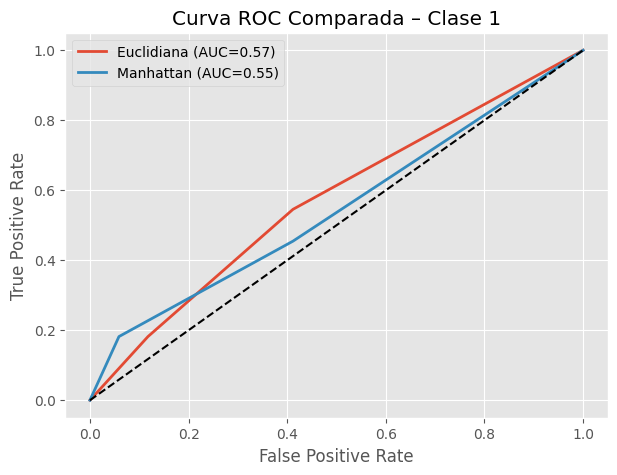

In [80]:

clase = 0

plt.figure(figsize=(7,5))


plt.plot(
    fpr_euclid[clase],
    tpr_euclid[clase],
    label=f"Euclidiana (AUC={auc_euclid[clase]:.2f})",
    linewidth=2
)


plt.plot(
    fpr_manhattan[clase],
    tpr_manhattan[clase],
    label=f"Manhattan (AUC={auc_manhattan[clase]:.2f})",
    linewidth=2
)


plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curva ROC Comparada – Clase {clases[clase]}")
plt.legend()
plt.show()
